<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

In [ ]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [ ]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


A 1 D linear regresion describes the relationship between input $x$ and output $y$, following the next equation:
$$
y = f[x,\phi]
= \phi_0 + \phi_1x
$$

In [ ]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO :  Replace this line with the linear regression model
  y = phi0 + phi1*x

  return y

In [ ]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

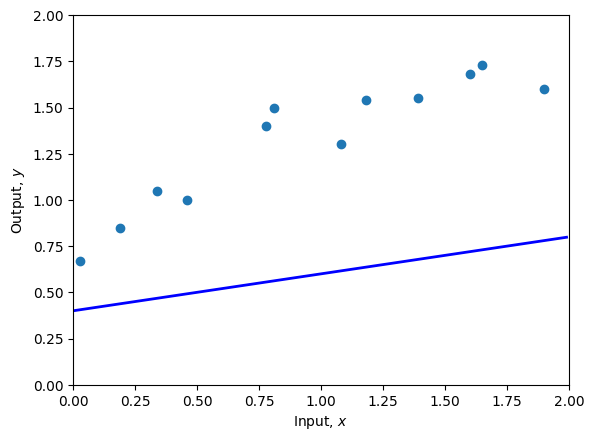

In [ ]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [ ]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):

  # TODO Replace this line with the loss calculation (slide 02.26)
  loss = (phi0 + phi1*x - y)**2


  return sum(loss)

In [ ]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


## Figure 2.c


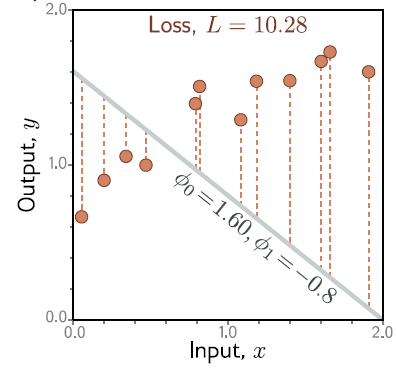


## Figure 2.d

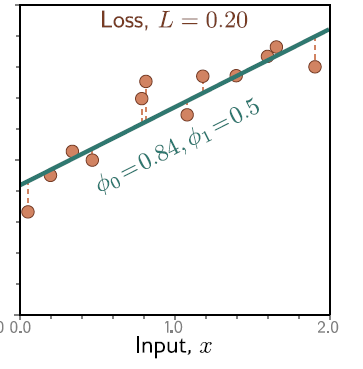

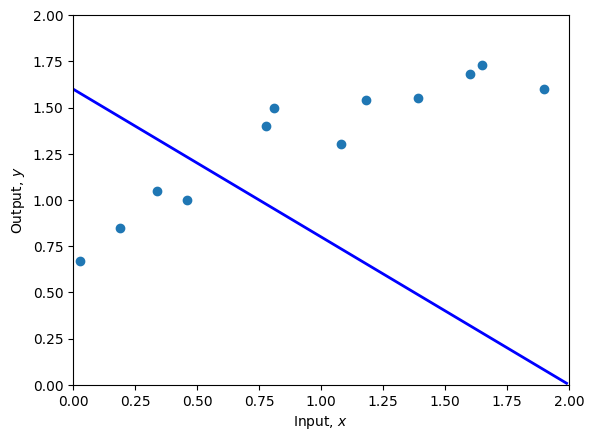

Your Loss = 10.28, Ground truth =10.28


In [ ]:
# Set the intercept and slope as in previous Figure
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

In [ ]:
import numpy as np

def calculate_phi_values(x, y, initial_phi0, initial_phi1, learning_rate=0.01, max_iters=1000, eps=1e-6):
    """
    Calculates the values of phi0 and phi1 using gradient descent.

    Args:
        x (np.array): Input data array.
        y (np.array): Output data array.
        initial_phi0 (float): Initial value of phi0.
        initial_phi1 (float): Initial value of phi1.
        learning_rate (float, optional): Learning rate for gradient descent. Defaults to 0.01.
        max_iters (int, optional): Maximum number of iterations. Defaults to 1000.
        eps (float, optional): Tolerance for convergence. Defaults to 1e-6.

    Returns:
        tuple: A tuple containing the converged values of phi0 and phi1.
    """

    phi0 = initial_phi0
    phi1 = initial_phi1
    loss_history = []

    for i in range(max_iters):
        # Calculate predicted y values based on current parameters
        y_pred = phi0 + phi1 * x

        # Calculate loss (replace with your desired loss function)
        loss = compute_loss(x,y, phi0, phi1)  # Fill in the appropriate loss calculation

        loss_history.append(loss)

        # Calculate gradients with respect to phi0 and phi1
        dloss_dphi0 = 2 * np.sum(y_pred - y)  # Derivative of MSE w.r.t. phi0
        dloss_dphi1 = 2 * np.sum(x * (y_pred - y))  # Derivative of MSE w.r.t. phi1

        # Update phi0 and phi1 using gradient descent
        phi0 -= learning_rate * dloss_dphi0
        phi1 -= learning_rate * dloss_dphi1

        # Check for convergence (optional)
        if i > 0 and abs(loss_history[i] - loss_history[i-1]) < eps:
            print(f"Converged after {i} iterations.")
            break

    return phi0, phi1, loss_history




Converged after 157 iterations.
[10.279524, 5.552805271272784, 4.150515793366705, 3.5957177732776753, 3.268559569258668, 3.0130100795975108, 2.788952284936244, 2.585303394657399, 2.3983138808324367, 2.226142220807052, 2.0674941919551784, 1.921277555484506, 1.7865107170380783, 1.6622952056127303, 1.5478044569199731, 1.4422770080952325, 1.3450111074241424, 1.2553599663589914, 1.172727438253408, 1.0965640491359105, 1.0263633426561611, 0.9616585120346322, 0.9020192959041776, 0.8470491172234902, 0.7963824461927489, 0.7496823696247741, 0.7066383506061792, 0.6669641635504758, 0.6303959909118803, 0.5966906689036774, 0.5656240705558659, 0.5369896153600564, 0.5105968955913476, 0.48627041017277567, 0.4638483976630386, 0.4431817606073215, 0.4241330740985947, 0.4065756719567025, 0.39039280444870467, 0.37547686194964, 0.3617286593813716, 0.34905677667131185, 0.3373769508453434, 0.32661151571259384, 0.31668888541619267, 0.3075430784158296, 0.29911327873678406, 0.29134343156791015, 0.284181870519464, 

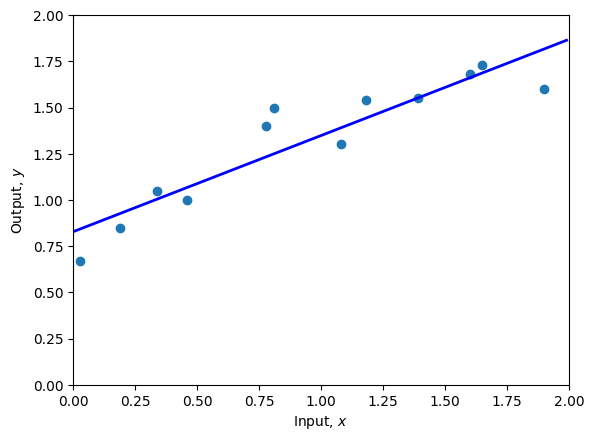

Your Loss = 0.20


In [ ]:
# TO DO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 1.60 ; phi1 =-0.8

phi0, phi1, loss_h = calculate_phi_values(x, y, phi0, phi1)

print(loss_h)
print(f'phi0 = {phi0}; phi1 = {phi1}')

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

# Visualizing the loss function

The above process is equivalent to to descending coordinate wise on the loss function<br>

Now let's plot that function

In [ ]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run throught each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


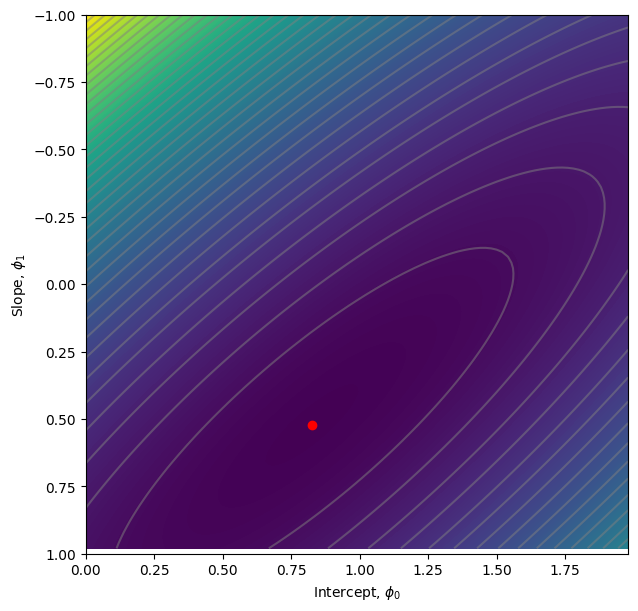

In [ ]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel('Intercept, $\phi_0$')
ax.set_ylabel('Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()

## 📝 Exercise 3: Step-by-Step Gradient Calculation in Linear Regression

### 🎯 Objective
Understand how to compute the gradient for linear regression and how parameters are updated using gradient descent.

---

### 🚀 Instructions
You are given a simple training dataset with two points:

$$
\{(x_1, y_1) = (1, 3), \quad (x_2, y_2) = (2, 5)\}
$$

We aim to fit a linear regression model:

$$
\hat{y} = \phi_0 + \phi_1 x
$$

- Initial parameters: $\phi_0 = 0$ and $\phi_1 = 0$  
- Loss function (Mean Squared Error):  

$$
L(\phi_0, \phi_1) = \frac{1}{2} \sum_{i=1}^{2} (\hat{y}_i - y_i)^2
$$

Follow these steps:

1. **Step 1: Calculate initial predictions** with $\phi_0=0$ and $\phi_1=0$.  
2. **Step 2: Compute the partial derivatives** of the loss with respect to $\phi_0$ and $\phi_1$:  

$$
\frac{\partial L}{\partial \phi_0} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}_i - y_i)
$$

$$
\frac{\partial L}{\partial \phi_1} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}_i - y_i) x_i
$$

3. **Step 3: Update the parameters** using gradient descent with a learning rate $\eta = 0.1$:

$$
\phi_0 := \phi_0 - \eta \frac{\partial L}{\partial \phi_0}
\quad \quad
\phi_1 := \phi_1 - \eta \frac{\partial L}{\partial \phi_1}
$$

4. **Step 4 (Optional):** Repeat the calculation for a second iteration and observe how the parameters move toward the optimal solution.

---

### ❓ Guiding Questions
- How do the predictions change after the first update step?  
- What happens if you increase or decrease the learning rate $\eta$?  
- How many steps do you think are necessary for a good fit?  

---


In [1]:
# 🚀 Solution Code: Gradient Calculation and Parameter Updates

import numpy as np

# Data points
x = np.array([1, 2])  # Input features
y = np.array([3, 5])  # Target values

# Initialize parameters
phi_0 = 0.0
phi_1 = 0.0

# Learning rate
eta = 0.1

# ---------------------------
# STEP 1: Initial Predictions
# ---------------------------
# Calculate predictions using: y_pred = phi_0 + phi_1 * x
y_pred = phi_0 + phi_1 * x
print(f"Step 1 - Initial predictions: {y_pred}")
# Expected: [0.0, 0.0] since both parameters are zero

# ---------------------------
# STEP 2: Compute Gradients
# ---------------------------
# Gradient formulas:
# dL_dphi0 = (1/n) * sum((y_pred - y))
# dL_dphi1 = (1/n) * sum((y_pred - y) * x)
n = len(x)
dL_dphi0 = np.mean(y_pred - y)
dL_dphi1 = np.mean((y_pred - y) * x)

print(f"Step 2 - Gradient w.r.t phi_0: {dL_dphi0:.4f}")
print(f"Step 2 - Gradient w.r.t phi_1: {dL_dphi1:.4f}")

# ---------------------------
# STEP 3: Update Parameters
# ---------------------------
# Update rules:
# phi_0 = phi_0 - eta * dL_dphi0
# phi_1 = phi_1 - eta * dL_dphi1
phi_0 -= eta * dL_dphi0
phi_1 -= eta * dL_dphi1

print(f"Step 3 - Updated phi_0: {phi_0:.4f}")
print(f"Step 3 - Updated phi_1: {phi_1:.4f}")

# ---------------------------
# STEP 4 (Optional): Second Update
# ---------------------------
# Recalculate predictions with updated parameters
y_pred = phi_0 + phi_1 * x

# Recompute gradients
dL_dphi0 = np.mean(y_pred - y)
dL_dphi1 = np.mean((y_pred - y) * x)

# Update parameters again
phi_0 -= eta * dL_dphi0
phi_1 -= eta * dL_dphi1

print("\nStep 4 - After second update:")
print(f"phi_0: {phi_0:.4f}")
print(f"phi_1: {phi_1:.4f}")


Step 1 - Initial predictions: [0. 0.]
Step 2 - Gradient w.r.t phi_0: -4.0000
Step 2 - Gradient w.r.t phi_1: -6.5000
Step 3 - Updated phi_0: 0.4000
Step 3 - Updated phi_1: 0.6500

Step 4 - After second update:
phi_0: 0.6625
phi_1: 1.0775


##  **Solution Walkthrough**

### **Step 1: Initial Predictions**
With $\phi_0=0$ and $\phi_1=0$:  

$$
\hat{y}_1 = 0 + 0 \cdot 1 = 0, \quad \hat{y}_2 = 0 + 0 \cdot 2 = 0
$$

**Predictions:** [0, 0]

---

### **Step 2: Gradient Computation**
Gradients are computed as:  

$$
\frac{\partial L}{\partial \phi_0} = \frac{1}{2}[(0 - 3) + (0 - 5)] = -4.0
$$

$$
\frac{\partial L}{\partial \phi_1} = \frac{1}{2}[(0 - 3)\cdot1 + (0 - 5)\cdot2] = -9.5
$$

---

###  **Step 3: Parameter Update**
Using $\eta=0.1$:  

$$
\phi_0 = 0 - 0.1 \cdot (-4.0) = 0.4
$$

$$
\phi_1 = 0 - 0.1 \cdot (-9.5) = 0.95
$$

---

### **Step 4: Second Update (Optional)**  
Recomputing with updated parameters leads to further improvement toward the best fit.

---

## **Reflections**
- Predictions get closer to actual values with each iteration.  
- Higher learning rates speed up learning but risk overshooting.  
- Optimal number of steps depends on the learning rate and data complexity.

---

## **Discussion Questions**
- How would using a learning rate of 0.5 or 0.01 change the updates?  
- Can you visualize how the line fits after each iteration?  
- How do gradients behave as the predictions improve?  


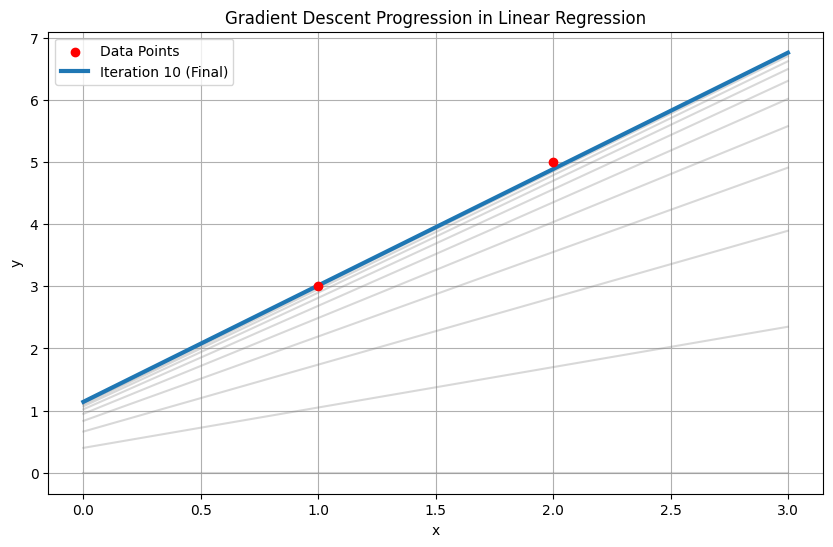

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2])
y = np.array([3, 5])

# Initialize parameters
phi_0 = 0.0
phi_1 = 0.0

# Learning rate
eta = 0.1

# Store parameter values for visualization
phi_0_values = [phi_0]
phi_1_values = [phi_1]

# Function to predict y given parameters
def predict(x, phi_0, phi_1):
    return phi_0 + phi_1 * x

# Perform gradient descent for multiple iterations
iterations = 10
for i in range(iterations):
    y_pred = predict(x, phi_0, phi_1)
    dL_dphi0 = np.mean(y_pred - y)
    dL_dphi1 = np.mean((y_pred - y) * x)
    phi_0 -= eta * dL_dphi0
    phi_1 -= eta * dL_dphi1

    phi_0_values.append(phi_0)
    phi_1_values.append(phi_1)

# Visualization of the fitting process
x_line = np.linspace(0, 3, 100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data Points', zorder=5)

# Plot regression lines at each iteration
for i in range(len(phi_0_values)):
    y_line = phi_0_values[i] + phi_1_values[i] * x_line
    if i == len(phi_0_values) - 1:
        plt.plot(x_line, y_line, label=f'Iteration {i} (Final)', linewidth=3, zorder=4)
    else:
        plt.plot(x_line, y_line, color='gray', alpha=0.3)

plt.title('Gradient Descent Progression in Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Now perform gradient descent with three different learning rates:

- Small: $\eta = 0.001$
- Moderate: $\eta = 0.01$
- Large: $\eta = 0.05$

Run gradient descent for 20 iterations for each learning rate.

Plot the loss value over iterations for each learning rate on the same graph.

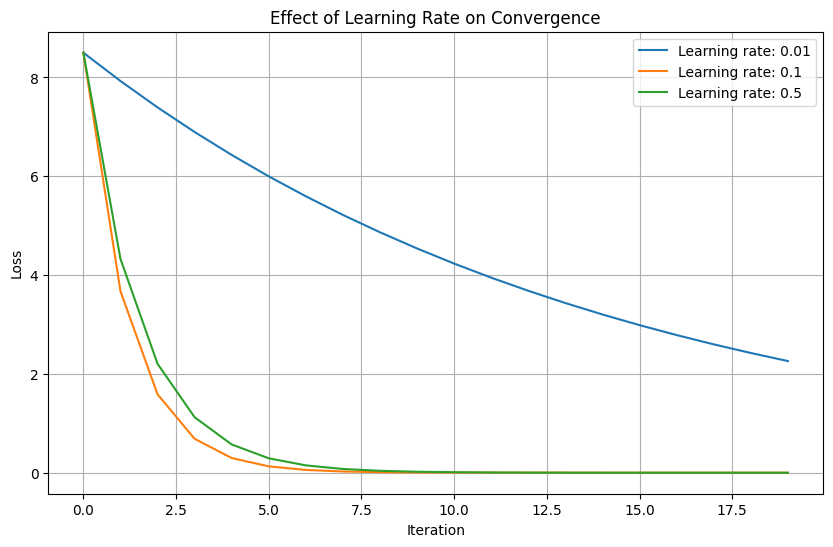

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2])
y = np.array([3, 5])

# Learning rates to test
learning_rates = [0.01, 0.1, 0.5]
iterations = 20

def gradient_descent(x, y, eta, iterations):
    phi_0, phi_1 = 0.0, 0.0
    loss_history = []

    for _ in range(iterations):
        y_pred = phi_0 + phi_1 * x
        loss = 0.5 * np.mean((y_pred - y) ** 2)  # Loss function
        loss_history.append(loss)

        # TODO: Calculate gradients
        dL_dphi0 = np.mean(y_pred - y)
        dL_dphi1 = np.mean((y_pred - y) * x)

        # TODO: Update parameters
        phi_0 -= eta * dL_dphi0
        phi_1 -= eta * dL_dphi1

    return loss_history

# Plot loss curves
plt.figure(figsize=(10, 6))

for eta in learning_rates:
    loss_history = gradient_descent(x, y, eta, iterations)
    plt.plot(range(iterations), loss_history, label=f'Learning rate: {eta}')

plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
